# Perform Sentimental analysis on Elon Musk tweets


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string
import spacy

from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk (1).csv


In [ ]:
elon=pd.read_csv('Elon_musk.csv',encoding='ISO-8859-1')

In [ ]:
elon.drop(columns='Unnamed: 0',inplace=True)
elon

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Word count in each tweet.

In [ ]:
elon['word_count']=elon['Text'].apply(lambda x: len(str(x).split(' ')))
elon.head(10)

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7
6,"Frodo was the underdoge,\nAll thought he would...",12
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11
9,The most entertaining outcome is the most likely,8


In [ ]:
elon['digits']=elon['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
elon['digits'].unique()
elon.sample(5)

,Text,word_count,digits
1492,@EverydayElon @ajtourville @comma_ai @Tesmania...,5,0
825,@ZainRaz4 @vincent13031925 @JonErlichman Close...,20,1
1048,"@akidesir @Kristennetten Yeah, we could put in...",17,0
852,@flcnhvy @NASASpaceflight @Erdayastronaut Minor,4,0
966,The gauntlet has been thrown down! \n\nThe pro...,18,0


In [ ]:
elon.digits.value_counts()

0     1854
1      117
2       23
3        3
4        1
10       1
Name: digits, dtype: int64

In [ ]:
elon['web_links']=elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
elon.head()

,Text,word_count,digits,web_links
0,@kunalb11 Im an alien,4,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,0,0
2,@joerogan @Spotify Great interview!,4,0,0
3,@gtera27 Doge is underestimated,4,0,0
4,@teslacn Congratulations Tesla China for amazi...,17,0,0


In [ ]:
elon.web_links.value_counts()

0    1356
1     632
2      11
Name: web_links, dtype: int64

In [ ]:
elon['hashtag']=elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
elon.head()

,Text,word_count,digits,web_links,hashtag
0,@kunalb11 Im an alien,4,0,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,0,0,0
2,@joerogan @Spotify Great interview!,4,0,0,0
3,@gtera27 Doge is underestimated,4,0,0,0
4,@teslacn Congratulations Tesla China for amazi...,17,0,0,0


In [ ]:
elon.hashtag.value_counts()

0    1990
1       5
2       3
4       1
Name: hashtag, dtype: int64

In [ ]:
elon=[Text.strip() for Text in elon.Text] # Remove both the leading and the trailing characters.
elon=[Text for Text in elon if Text] # Removes empty strings, because they are considered as False in Python.
elon[:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [ ]:
# Joining the list into one string/ text.

elon_text=' '.join(elon)
elon_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

# Extract reviews of any product from e-commerce websites like amazon & perform emotion mining.

In [ ]:
# Importing necessary libraries

import pandas as pd # Data processing
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Graphical Representation
%matplotlib inline
import seaborn as sns 

import string # Special operations for strings.
import spacy # Language models.

from nltk.corpus import stopwords # Stopwords in English language especially.

from wordcloud import WordCloud
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [ ]:
headers = {'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',   
    
}

In [ ]:
def get_soup(url):
    r = requests.get(url, headers=headers,  params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

# Look for web-tags in our soup, then append our data to reviewList

In [ ]:
# Initialize list to store reviews data later on

reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
# Loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/Airdopes-121v2-Bluetooth-Immersive-Assistant/product-reviews/B08JQN8DGZ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [ ]:
# Save results to a dataframe.

data = pd.DataFrame(reviewlist)
data.to_csv('Amzon_boat.csv', index=False)
data

,Rating,Title,Review,Review_Date
0,4.0,Best one from whatever so far i have used,Best for me. This is my second purchase of the...,Reviewed in India 🇮🇳 on 6 December 2022
1,4.0,"Good for music, not made for calling",while talking on a call our voice gets muffled...,Reviewed in India 🇮🇳 on 5 December 2022
2,4.0,Great sound bad mic,Got it for 800 and the music quality is more t...,Reviewed in India 🇮🇳 on 23 November 2022
3,4.0,कुल मिलाकर प्रोडक्ट अच्छा है।,अच्छा है और अपने काम करते समय फोन कोल कर सकते ...,Reviewed in India 🇮🇳 on 5 December 2022
4,4.0,Feeling noise during in call by other person.,Everything is good but while attending call fr...,Reviewed in India 🇮🇳 on 1 December 2022
...,...,...,...,...
4995,4.0,Best 👍,Osm products 🥰,Reviewed in India 🇮🇳 on 9 November 2021
4996,4.0,Have Connectivity issues,"It's sound quality is very good , they are als...",Reviewed in India 🇮🇳 on 1 February 2021
4997,5.0,sleek and smart design,but drivers must more upto 12mm.then it will b...,Reviewed in India 🇮🇳 on 24 June 2022
4998,1.0,No guaranty for quality and no response,DislikeLeft side not working within 3 monthsNo...,Reviewed in India 🇮🇳 on 26 September 2022


In [ ]:
data=pd.read_csv('Amzon_boat.csv')
data.head(10)

,Rating,Title,Review,Review_Date
0,4.0,Best one from whatever so far i have used,Best for me. This is my second purchase of the...,Reviewed in India 🇮🇳 on 6 December 2022
1,4.0,"Good for music, not made for calling",while talking on a call our voice gets muffled...,Reviewed in India 🇮🇳 on 5 December 2022
2,4.0,Great sound bad mic,Got it for 800 and the music quality is more t...,Reviewed in India 🇮🇳 on 23 November 2022
3,4.0,कुल मिलाकर प्रोडक्ट अच्छा है।,अच्छा है और अपने काम करते समय फोन कोल कर सकते ...,Reviewed in India 🇮🇳 on 5 December 2022
4,4.0,Feeling noise during in call by other person.,Everything is good but while attending call fr...,Reviewed in India 🇮🇳 on 1 December 2022
5,4.0,Phone pe shi se avaj nhi ati h aor shi se jati...,Song sunte time achi avaj ati h pr kabhi kabhi...,Reviewed in India 🇮🇳 on 2 December 2022
6,4.0,Good headphones to buy in this budget,Good headphones to buy in this budget. Only th...,Reviewed in India 🇮🇳 on 26 November 2022
7,4.0,Good sound quality.,It has amazing design with stylish look. Sound...,Reviewed in India 🇮🇳 on 26 November 2022
8,4.0,It was excellent,It was a good product of boat company and ther...,Reviewed in India 🇮🇳 on 26 November 2022
9,4.0,The left side bud is not working,The product is goodBut the left side bud is no...,Reviewed in India 🇮🇳 on 27 November 2022


In [ ]:
# Removing 'Reviewed in India 🇮🇳 on '

Review_date=[0]

word_list = ['Reviewed', 'in', 'India', '🇮🇳' , 'on']
repl_wrd = ''

for i in range(0, len(data)):
    new_string = ' '.join([repl_wrd if idx in word_list else idx for idx in data.Review_Date[i].split()])
    Review_date.append(new_string)

data['Review_Date'] = Review_date[1:]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       4829 non-null   object 
 3   Review_Date  5000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 156.4+ KB


In [ ]:
data.Rating.describe()

count    5000.00000
mean        3.62540
std         1.18952
min         1.00000
25%         3.00000
50%         4.00000
75%         5.00000
max         5.00000
Name: Rating, dtype: float64

In [ ]:
data.Review.isna().sum()

171

In [ ]:
# For those entries where data.Review is null, replace Review with Title
data['Review'] = data['Review'].fillna(data['Title'])


#Stripping white spaces in Review_date
review_date = [0]

for i in range(0, len(data)):
    a= data.Review_Date[i].strip()
    review_date.append(a)

    
data['Review_Date']= review_date[1:]

# No. of words in each tweet

In [ ]:
data ['word_count'] = data ['Review'].apply(lambda x: len(str(x).split(' ')))
data[['Rating', 'Review', 'word_count']] .head()

,Rating,Review,word_count
0,4.0,Best for me. This is my second purchase of the...,34
1,4.0,while talking on a call our voice gets muffled...,29
2,4.0,Got it for 800 and the music quality is more t...,101
3,4.0,अच्छा है और अपने काम करते समय फोन कोल कर सकते ...,22
4,4.0,Everything is good but while attending call fr...,41


# Number of Stopwords.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')
data['stopword_count']=data.Review.apply(lambda x: len([x for x in x.split() if x in stop])) 
data[['Rating', 'Review', 'word_count', 'stopword_count']].head()

,Rating,Review,word_count,stopword_count
0,4.0,Best for me. This is my second purchase of the...,34,20
1,4.0,while talking on a call our voice gets muffled...,29,15
2,4.0,Got it for 800 and the music quality is more t...,101,39
3,4.0,अच्छा है और अपने काम करते समय फोन कोल कर सकते ...,22,0
4,4.0,Everything is good but while attending call fr...,41,19


# Number of digits.

In [ ]:
data['digits'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits']].head()


,Rating,Review,word_count,stopword_count,digits
0,4.0,Best for me. This is my second purchase of the...,34,20,0
1,4.0,while talking on a call our voice gets muffled...,29,15,0
2,4.0,Got it for 800 and the music quality is more t...,101,39,4
3,4.0,अच्छा है और अपने काम करते समय फोन कोल कर सकते ...,22,0,0
4,4.0,Everything is good but while attending call fr...,41,19,0


# Number of URLs

In [ ]:
data['web_links'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links']].head()


,Rating,Review,word_count,stopword_count,digits,web_links
0,4.0,Best for me. This is my second purchase of the...,34,20,0,0
1,4.0,while talking on a call our voice gets muffled...,29,15,0,0
2,4.0,Got it for 800 and the music quality is more t...,101,39,4,0
3,4.0,अच्छा है और अपने काम करते समय फोन कोल कर सकते ...,22,0,0,0
4,4.0,Everything is good but while attending call fr...,41,19,0,0


# Number of weblinks.

In [ ]:
data.web_links.value_counts()
#no weblinks

0    5000
Name: web_links, dtype: int64

# Number of Hashtags.

In [ ]:
data['hashtag'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links', 'hashtag']].head()

,Rating,Review,word_count,stopword_count,digits,web_links,hashtag
0,4.0,Best for me. This is my second purchase of the...,34,20,0,0,0
1,4.0,while talking on a call our voice gets muffled...,29,15,0,0,0
2,4.0,Got it for 800 and the music quality is more t...,101,39,4,0,0
3,4.0,अच्छा है और अपने काम करते समय फोन कोल कर सकते ...,22,0,0,0,0
4,4.0,Everything is good but while attending call fr...,41,19,0,0,0


In [ ]:
data.hashtag.value_counts()
# 4 hashtags

0    4997
1       3
Name: hashtag, dtype: int64

# Feature Engineering

In [ ]:
data['date'] = data['Review_Date'].str.split(' ').str[0] 
data['Month'] = data['Review_Date'].str.split(' ').str[1] 
data['Year'] = data['Review_Date'].str.split(' ').str[2] 
data[['Review_Date', 'date', 'Month', 'Year']]

,Review_Date,date,Month,Year
0,6 December 2022,6,December,2022
1,5 December 2022,5,December,2022
2,23 November 2022,23,November,2022
3,5 December 2022,5,December,2022
4,1 December 2022,1,December,2022
...,...,...,...,...
4995,9 November 2021,9,November,2021
4996,1 February 2021,1,February,2021
4997,24 June 2022,24,June,2022
4998,26 September 2022,26,September,2022


In [ ]:
# Keeping useful columns and droppping others for the moment
data1 = data[['Rating','Title','Review', 'date', 'Month', 'Year']]
data1

,Rating,Title,Review,date,Month,Year
0,4.0,Best one from whatever so far i have used,Best for me. This is my second purchase of the...,6,December,2022
1,4.0,"Good for music, not made for calling",while talking on a call our voice gets muffled...,5,December,2022
2,4.0,Great sound bad mic,Got it for 800 and the music quality is more t...,23,November,2022
3,4.0,कुल मिलाकर प्रोडक्ट अच्छा है।,अच्छा है और अपने काम करते समय फोन कोल कर सकते ...,5,December,2022
4,4.0,Feeling noise during in call by other person.,Everything is good but while attending call fr...,1,December,2022
...,...,...,...,...,...,...
4995,4.0,Best 👍,Osm products 🥰,9,November,2021
4996,4.0,Have Connectivity issues,"It's sound quality is very good , they are als...",1,February,2021
4997,5.0,sleek and smart design,but drivers must more upto 12mm.then it will b...,24,June,2022
4998,1.0,No guaranty for quality and no response,DislikeLeft side not working within 3 monthsNo...,26,September,2022


# Data Visualization

In [ ]:
#Reviews by Year

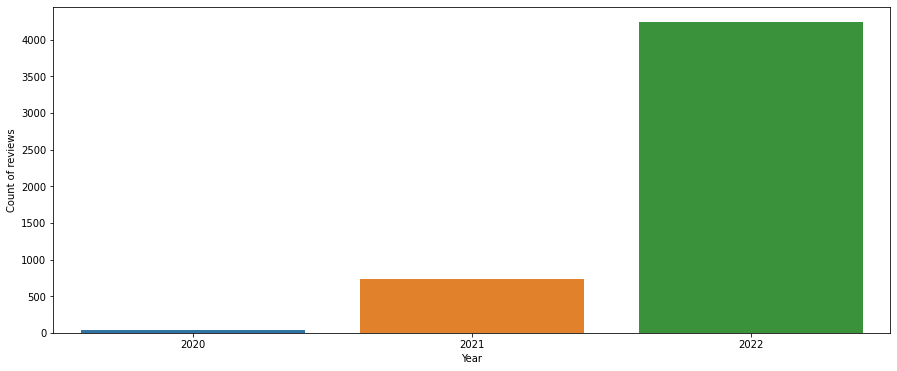

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(data1.Year, order=['2020','2021','2022'] ) 
plt.xlabel('Year')
plt.ylabel('Count of reviews')
plt.show()

We can see that most of the reviews were recieved in the year 2022 we close to 4500.

# Reviews by Month-Year

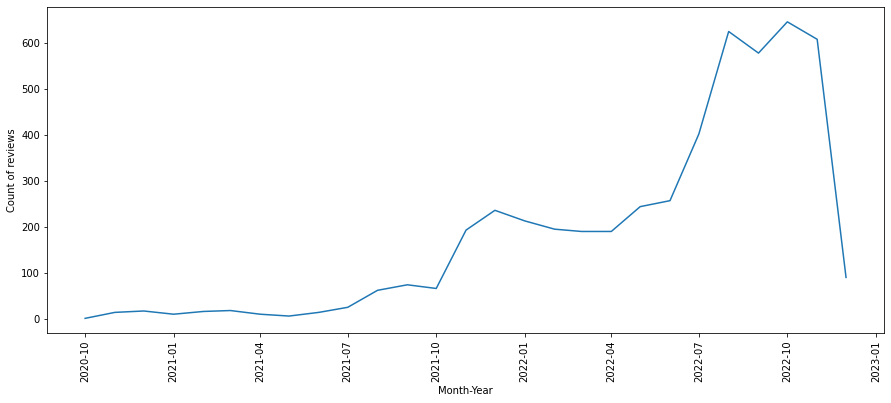

In [ ]:
data['Mo_Year'] = data['Month'] + ' ' + data['Year'] 
a = pd.DataFrame(data['Mo_Year'].value_counts() ) 
a = a.reset_index(level=0)
# convert to date
a['index'] = pd.to_datetime(a['index'])
a.sort_values(by='index').reset_index(drop=True) 

a = a.rename(columns={'index':'month_year', 'Mo_Year': 'review_count'}) 
plt.figure(figsize=(15,6))
sns.lineplot(x=a.month_year, y=a.review_count)
plt.xlabel('Month-Year')
plt.ylabel('Count of reviews')
plt.xticks(rotation = 90 )
plt.show() 

Most of the reviews were recieved during the months of July and October in the year 2022. On a particular day of the month the views peaked close to 650.

# Reviews by Stars

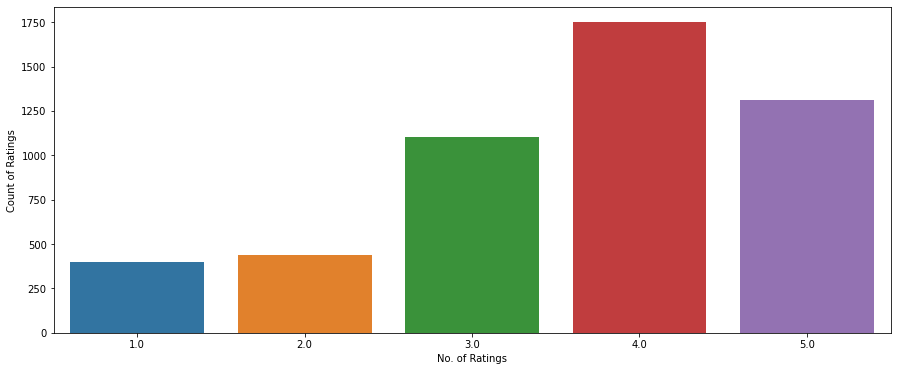

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data1.Rating) 
plt.xlabel('No. of Ratings')
plt.ylabel('Count of Ratings')
plt.show()

From the above countplot we can conclude that most of the ratings were 4.

# Text Processing

In [ ]:
# Keeping features which are important for time being.

data2 = data1[['Review']] 
data2

,Review
0,Best for me. This is my second purchase of the...
1,while talking on a call our voice gets muffled...
2,Got it for 800 and the music quality is more t...
3,अच्छा है और अपने काम करते समय फोन कोल कर सकते ...
4,Everything is good but while attending call fr...
...,...
4995,Osm products 🥰
4996,"It's sound quality is very good , they are als..."
4997,but drivers must more upto 12mm.then it will b...
4998,DislikeLeft side not working within 3 monthsNo...


Removing punctuations, digits, emoticons and normalizing the reviews.

In [ ]:
import re 
corpus = []



for i in range(0, len(data2)):
    #review = re.sub('@[^\s]+' , '' , data2.Review[i]) #remove userid
    #review = re.sub(r'http\S+' , '', review ) #remove URL
    
    review = re.sub(r'[^\w\s]', '', data2.Review[i]) #remove punctuation
    review = review.lower() #normalise
    review = re.sub(r'\d', '', review) #remove digits
    
    corpus.append(review)

In [ ]:
corpus

['best for me this is my second purchase of the same model as i felt this is great i have brought it again keeping one for my official use and the other for personal',
 'while talking on a call our voice gets muffled and a little disturbance is heard by the person on other end surely good for music but not for calling',
 'got it for  and the music quality is more than worth it has been working great for more than  months now surprisingly great battery life buds run upto  hours or more without charge and charge within  minutes the case can completely charge the buds  times the case takes  mins to charge completelymic quality is very poor though might just be a defect on my piece the things we say are feeble to the listener and the background noise is more prominent in the mic than our words yet again might just be my pieces defect',
 'अचछ ह और अपन कम करत समय फन कल कर सकत ह हथ खल ह जत ह बत भ अचछ हत ह',
 'everything is good but while attending call from this airbuds other person got noisy

In [ ]:
data2['clean_reviews'] = corpus 
data2

,Review,clean_reviews
0,Best for me. This is my second purchase of the...,best for me this is my second purchase of the ...
1,while talking on a call our voice gets muffled...,while talking on a call our voice gets muffled...
2,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...
3,अच्छा है और अपने काम करते समय फोन कोल कर सकते ...,अचछ ह और अपन कम करत समय फन कल कर सकत ह हथ खल ह...
4,Everything is good but while attending call fr...,everything is good but while attending call fr...
...,...,...
4995,Osm products 🥰,osm products
4996,"It's sound quality is very good , they are als...",its sound quality is very good they are also ...
4997,but drivers must more upto 12mm.then it will b...,but drivers must more upto mmthen it will be o...
4998,DislikeLeft side not working within 3 monthsNo...,dislikeleft side not working within monthsnot...


# Removing stopwords

In [ ]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = []

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):
    
    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]
    
    clean_reviews.append(' '.join(words_without_stopwords))
    
data2['absolute_clean_reviews'] = clean_reviews
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,Best for me. This is my second purchase of the...,best for me this is my second purchase of the ...,best second purchase model felt great brought ...
1,while talking on a call our voice gets muffled...,while talking on a call our voice gets muffled...,talking call voice gets muffled little disturb...
2,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...,got music quality worth working great months s...
3,अच्छा है और अपने काम करते समय फोन कोल कर सकते ...,अचछ ह और अपन कम करत समय फन कल कर सकत ह हथ खल ह...,अचछ ह और अपन कम करत समय फन कल कर सकत ह हथ खल ह...
4,Everything is good but while attending call fr...,everything is good but while attending call fr...,everything good attending call airbuds person ...
5,Song sunte time achi avaj ati h pr kabhi kabhi...,song sunte time achi avaj ati h pr kabhi kabhi...,song sunte time achi avaj ati h pr kabhi kabhi...
6,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...,good headphones buy budget thing dont like mic...
7,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...,amazing design stylish look sound quality good...
8,It was a good product of boat company and ther...,it was a good product of boat company and ther...,good product boat company clearlty sound bass ...
9,The product is goodBut the left side bud is no...,the product is goodbut the left side bud is no...,product goodbut left side bud workingi brought...


# Tokenisation

In [ ]:
tokenized_review = data2['absolute_clean_reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [best, second, purchase, model, felt, great, b...
1    [talking, call, voice, gets, muffled, little, ...
2    [got, music, quality, worth, working, great, m...
3    [अचछ, ह, और, अपन, कम, करत, समय, फन, कल, कर, सक...
4    [everything, good, attending, call, airbuds, p...
5    [song, sunte, time, achi, avaj, ati, h, pr, ka...
6    [good, headphones, buy, budget, thing, dont, l...
7    [amazing, design, stylish, look, sound, qualit...
8    [good, product, boat, company, clearlty, sound...
9    [product, goodbut, left, side, bud, workingi, ...
Name: absolute_clean_reviews, dtype: object

# Lemmatisation

In [ ]:
import nltk
nltk.download('omw-1.4') 
nltk.download('wordnet')  

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

word_lemmatizer = WordNetLemmatizer()

tokenized_review = tokenized_review.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_review.head(10)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


0    [best, second, purchase, model, felt, great, b...
1    [talking, call, voice, get, muffled, little, d...
2    [got, music, quality, worth, working, great, m...
3    [अचछ, ह, और, अपन, कम, करत, समय, फन, कल, कर, सक...
4    [everything, good, attending, call, airbuds, p...
5    [song, sunte, time, achi, avaj, ati, h, pr, ka...
6    [good, headphone, buy, budget, thing, dont, li...
7    [amazing, design, stylish, look, sound, qualit...
8    [good, product, boat, company, clearlty, sound...
9    [product, goodbut, left, side, bud, workingi, ...
Name: absolute_clean_reviews, dtype: object

**Joining** **tokens** **into** **sentence**

In [ ]:
for i, tokens in enumerate(tokenized_review):
    tokenized_review[i] = ' '.join(tokens)

data2['absolute_clean_reviews'] = tokenized_review
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,Best for me. This is my second purchase of the...,best for me this is my second purchase of the ...,best second purchase model felt great brought ...
1,while talking on a call our voice gets muffled...,while talking on a call our voice gets muffled...,talking call voice get muffled little disturba...
2,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...,got music quality worth working great month su...
3,अच्छा है और अपने काम करते समय फोन कोल कर सकते ...,अचछ ह और अपन कम करत समय फन कल कर सकत ह हथ खल ह...,अचछ ह और अपन कम करत समय फन कल कर सकत ह हथ खल ह...
4,Everything is good but while attending call fr...,everything is good but while attending call fr...,everything good attending call airbuds person ...
5,Song sunte time achi avaj ati h pr kabhi kabhi...,song sunte time achi avaj ati h pr kabhi kabhi...,song sunte time achi avaj ati h pr kabhi kabhi...
6,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...,good headphone buy budget thing dont like micr...
7,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...,amazing design stylish look sound quality good...
8,It was a good product of boat company and ther...,it was a good product of boat company and ther...,good product boat company clearlty sound bass ...
9,The product is goodBut the left side bud is no...,the product is goodbut the left side bud is no...,product goodbut left side bud workingi brought...


# Basic Feature Extraction

In [ ]:
#Bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(data2.absolute_clean_reviews)  
print(vectorizer.vocabulary_)

{'best': 539, 'second': 4471, 'purchase': 4010, 'model': 3156, 'felt': 1878, 'great': 2176, 'brought': 692, 'keeping': 2711, 'one': 3447, 'official': 3407, 'use': 5273, 'personal': 3655, 'talking': 4926, 'call': 765, 'voice': 5364, 'get': 2063, 'muffled': 3238, 'little': 2881, 'disturbance': 1487, 'heard': 2291, 'person': 3654, 'end': 1689, 'surely': 4885, 'good': 2103, 'music': 3251, 'calling': 772, 'got': 2168, 'quality': 4031, 'worth': 5581, 'working': 5545, 'month': 3187, 'surprisingly': 4889, 'battery': 477, 'life': 2836, 'bud': 703, 'run': 4383, 'upto': 5260, 'hour': 2372, 'without': 5525, 'charge': 923, 'within': 5524, 'minute': 3133, 'case': 864, 'completely': 1107, 'time': 5072, 'take': 4919, 'min': 3123, 'completelymic': 1108, 'poor': 3765, 'though': 5049, 'might': 3110, 'defect': 1328, 'piece': 3698, 'thing': 5019, 'say': 4438, 'feeble': 1869, 'listener': 2869, 'background': 399, 'noise': 3338, 'prominent': 3957, 'mic': 3095, 'word': 5541, 'yet': 5625, 'अचछ': 5650, 'और': 568

# Removing some more stopwords.

In [ ]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = ['aa', 'aaa', 'aage', 'aagya', 'aaj', 'aajate', 'aap', 'aapki', 'aata', 'aati', 'aavaj', 'aawaj', 'aawaz', 'aaya', 'ab', 'abhi','accha', 'acche','awaaz', 'awaj', 'awaz','badha', 'badhiya', 'badi', 'badiya'] 

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):
    
    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]
    
    clean_reviews.append(' '.join(words_without_stopwords))
    
data2['absolute_clean_reviews'] = clean_reviews
data2.head(10) 

,Review,clean_reviews,absolute_clean_reviews
0,Best for me. This is my second purchase of the...,best for me this is my second purchase of the ...,best second purchase model felt great brought ...
1,while talking on a call our voice gets muffled...,while talking on a call our voice gets muffled...,talking call voice gets muffled little disturb...
2,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...,got music quality worth working great months s...
3,अच्छा है और अपने काम करते समय फोन कोल कर सकते ...,अचछ ह और अपन कम करत समय फन कल कर सकत ह हथ खल ह...,अचछ ह और अपन कम करत समय फन कल कर सकत ह हथ खल ह...
4,Everything is good but while attending call fr...,everything is good but while attending call fr...,everything good attending call airbuds person ...
5,Song sunte time achi avaj ati h pr kabhi kabhi...,song sunte time achi avaj ati h pr kabhi kabhi...,song sunte time achi avaj ati h pr kabhi kabhi...
6,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...,good headphones buy budget thing dont like mic...
7,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...,amazing design stylish look sound quality good...
8,It was a good product of boat company and ther...,it was a good product of boat company and ther...,good product boat company clearlty sound bass ...
9,The product is goodBut the left side bud is no...,the product is goodbut the left side bud is no...,product goodbut left side bud workingi brought...


**Let**'**s** **see** **how** **many** **bi**-**grams** **and** **tri**-**grams** **can** **be** **induced** **here**.



In [ ]:
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3), min_df=3) 
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

count_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df

,able,able connect,able hear,able hear clearly,able hear properly,able hear voice,able listen,able use,absolute,absolutely,...,बहत,बहत अचछ,मझ,रह,लए,वल,सउड,सकत,सह,हत
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **TF**-**IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

count_df_tf_idf = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df_tf_idf

,able,able connect,able hear,able hear clearly,able hear properly,able hear voice,able listen,able use,absolute,absolutely,...,रह,लए,वल,सउड,सकत,सफ,सफ नह,सह,सह नह,हत
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.277342,0.0,0.0,0.0,0.0,0.282988
4,0.181702,0.0,0.0,0.0,0.0,0.0,0.0,0.277311,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [ ]:
data2

,Review,clean_reviews,absolute_clean_reviews
0,Best for me. This is my second purchase of the...,best for me this is my second purchase of the ...,best second purchase model felt great brought ...
1,while talking on a call our voice gets muffled...,while talking on a call our voice gets muffled...,talking call voice gets muffled little disturb...
2,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...,got music quality worth working great months s...
3,अच्छा है और अपने काम करते समय फोन कोल कर सकते ...,अचछ ह और अपन कम करत समय फन कल कर सकत ह हथ खल ह...,अचछ ह और अपन कम करत समय फन कल कर सकत ह हथ खल ह...
4,Everything is good but while attending call fr...,everything is good but while attending call fr...,everything good attending call airbuds person ...
...,...,...,...
4995,Osm products 🥰,osm products,osm products
4996,"It's sound quality is very good , they are als...",its sound quality is very good they are also ...,sound quality good also lite weight comfortabl...
4997,but drivers must more upto 12mm.then it will b...,but drivers must more upto mmthen it will be o...,drivers must upto mmthen outstanding
4998,DislikeLeft side not working within 3 monthsNo...,dislikeleft side not working within monthsnot...,dislikeleft side working within monthsnot resp...


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving affin.csv to affin.csv


In [ ]:
afinn = pd.read_csv('affin.csv',encoding='latin') 
affinity_scores = afinn.set_index('word')['value'].to_dict()
sent = []
a = 0 
for i in range(0,len(data2)):
    
    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):
        
        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = a + affinity_scores[word]
    sent.append(a) 
    a = 0   
data2['sentiment_value'] = sent 
data2[['absolute_clean_reviews', 'sentiment_value']]

,absolute_clean_reviews,sentiment_value
0,best second purchase model felt great brought ...,2
1,talking call voice gets muffled little disturb...,0
2,got music quality worth working great months s...,-1
3,अचछ ह और अपन कम करत समय फन कल कर सकत ह हथ खल ह...,0
4,everything good attending call airbuds person ...,-1
...,...,...
4995,osm products,0
4996,sound quality good also lite weight comfortabl...,3
4997,drivers must upto mmthen outstanding,1
4998,dislikeleft side working within monthsnot resp...,0


In [ ]:
data2['sentiment'] = data2['sentiment_value'].apply(lambda c: 'Positive' if c >0 else ('Negative' if c<=-1  else 'Neutral'))
data2[['absolute_clean_reviews','sentiment_value','sentiment']]

,absolute_clean_reviews,sentiment_value,sentiment
0,best second purchase model felt great brought ...,2,Positive
1,talking call voice gets muffled little disturb...,0,Neutral
2,got music quality worth working great months s...,-1,Negative
3,अचछ ह और अपन कम करत समय फन कल कर सकत ह हथ खल ह...,0,Neutral
4,everything good attending call airbuds person ...,-1,Negative
...,...,...,...
4995,osm products,0,Neutral
4996,sound quality good also lite weight comfortabl...,3,Positive
4997,drivers must upto mmthen outstanding,1,Positive
4998,dislikeleft side working within monthsnot resp...,0,Neutral


In [ ]:
data2.sentiment.value_counts()

Positive    3115
Neutral     1179
Negative     706
Name: sentiment, dtype: int64

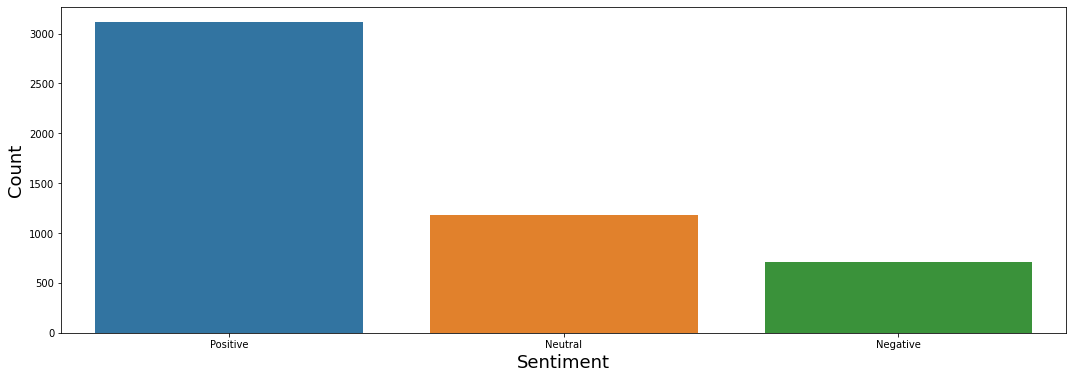

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(data2.sentiment);
plt.xlabel('Sentiment',fontsize=18)
plt.ylabel('Count',fontsize=18);

We can see that there are more positive reviews about the product.

# Wordcloud for Positive words

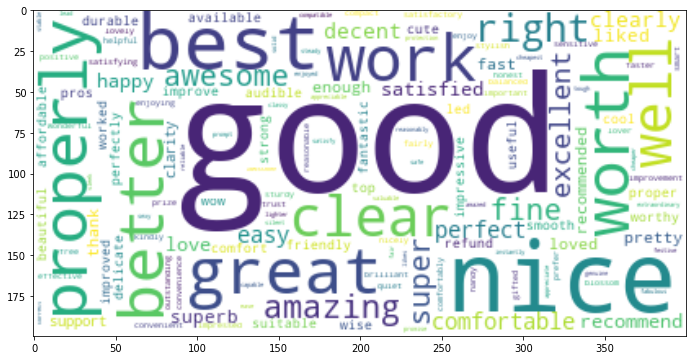

In [ ]:
positive = []
negative = []
neutral = [] 
for i in range(0,len(data2)):
    
    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):
        
        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = affinity_scores[word]
            if a > 0: 
                positive.append(word)
            elif a < 0:
                negative.append(word)
            else :
                neutral.append(word)
  
pos =' '.join(positive) 
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(pos)
plt.imshow(word_cloud, interpolation='bilinear')


# Word cloud for Negative words

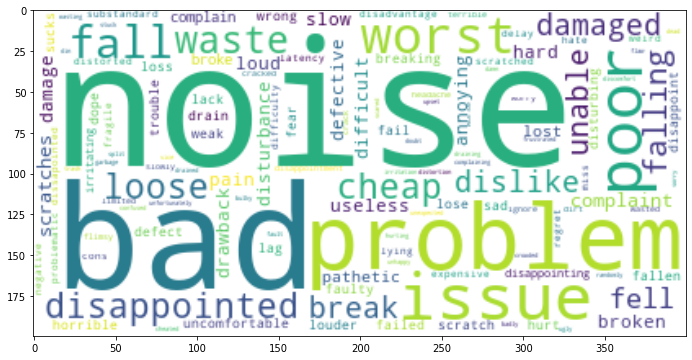

In [ ]:
neg = ' '.join(negative) 
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(neg)
plt.imshow(word_cloud, interpolation='bilinear')

# Wordcloud for All words

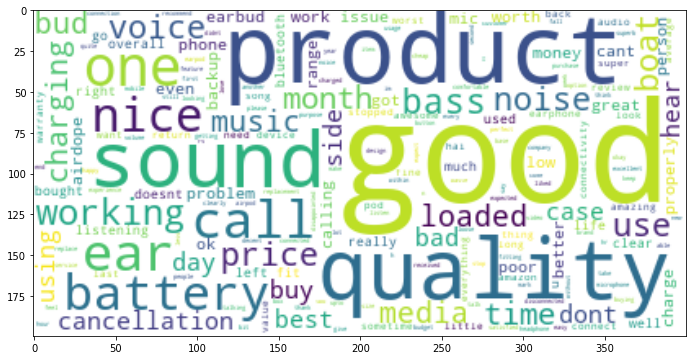

In [ ]:
absolute_clean_reviews_string=' '.join(data2.absolute_clean_reviews)
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(absolute_clean_reviews_string)
plt.imshow(word_cloud, interpolation='bilinear')